In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
# Read Text File
dataset = pd.read_csv('/content/Amazon Reviews_train.ft.txt',sep='\t',names=['Review'])

In [5]:
#First glance of the data
dataset.head()

# In this case, the classes are __label__1 and __label__2, and there is only one class per row.

# __label__1 corresponds to 1- and 2-star reviews, and __label__2 corresponds to 4- and 5-star reviews.

# (3-star reviews i.e. reviews with neutral sentiment were not included in the original),

# The review titles, followed by ':' and a space, are prepended to the text.


,Review
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [6]:
# Split review tile
data_processed = dataset['Review'].str.split(':',n=1,expand=True)
data_processed.columns = ['Title','Review']
data_processed.head()

,Title,Review
0,__label__2 Stuning even for the non-gamer,This sound track was beautiful! It paints the...
1,__label__2 The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...
2,__label__2 Amazing!,This soundtrack is my favorite music of all t...
3,__label__2 Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...
4,"__label__2 Remember, Pull Your Jaw Off The Flo...","If you've played the game, you know how divin..."


In [7]:
# __label__1 corresponds to 1- and 2-star reviews, and __label__2 corresponds to 4- and 5-star reviews.

# So categorise label1 to Bad and label2 to Good

data_processed['Category'] = ['Bad' if '1' in title else 'Good' for title in data_processed['Title']]

data_processed.head()

,Title,Review,Category
0,__label__2 Stuning even for the non-gamer,This sound track was beautiful! It paints the...,Good
1,__label__2 The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...,Good
2,__label__2 Amazing!,This soundtrack is my favorite music of all t...,Good
3,__label__2 Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...,Good
4,"__label__2 Remember, Pull Your Jaw Off The Flo...","If you've played the game, you know how divin...",Good


In [8]:
# Check Bad review

data_processed[data_processed['Category'] == 'Bad']

,Title,Review,Category
6,__label__1 Buyer beware,"This is a self-published book, and if you wan...",Bad
10,__label__1 The Worst!,A complete waste of time. Typographical error...,Bad
13,__label__1 Oh please,I guess you have to be a romance novel lover ...,Bad
14,__label__1 Awful beyond belief!,I feel I have to write to keep others from wa...,Bad
15,__label__1 Don't try to fool us with fake revi...,It's glaringly obvious that all of the glowin...,Bad
...,...,...,...
4706,__label__1 Not what expected,"As a Noni user for many years, when my prefer...",Bad
4710,__label__1 Frontin',Who gave this guy a music contract? This song...,Bad
4712,__label__1 It's not the greatest song,I love the neptunes and almost everything don...,Bad
4713,__label__1 The Return of Randy Watson,"""Sexual Chocolate"": I'll give the Neptunes Pro...",Bad


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [10]:
# Initialise tokenizer and vocal size 5000

tokenizer = Tokenizer(num_words=5000,oov_token='OOV')

In [11]:
tokenizer.fit_on_texts(data_processed['Review'])
word_index = tokenizer.word_index
word_index

{'OOV': 1,
 'the': 2,
 'and': 3,
 'i': 4,
 'a': 5,
 'to': 6,
 'it': 7,
 'of': 8,
 'this': 9,
 'is': 10,
 'in': 11,
 'for': 12,
 'that': 13,
 'was': 14,
 'you': 15,
 'not': 16,
 'but': 17,
 'on': 18,
 'with': 19,
 'book': 20,
 'have': 21,
 'my': 22,
 'as': 23,
 'are': 24,
 'one': 25,
 'be': 26,
 'so': 27,
 'all': 28,
 'if': 29,
 'they': 30,
 'very': 31,
 'like': 32,
 'at': 33,
 'just': 34,
 'about': 35,
 'from': 36,
 'or': 37,
 'me': 38,
 'would': 39,
 'read': 40,
 'an': 41,
 'out': 42,
 'good': 43,
 'has': 44,
 'had': 45,
 'when': 46,
 'great': 47,
 'more': 48,
 'by': 49,
 'only': 50,
 'up': 51,
 'time': 52,
 'will': 53,
 'get': 54,
 "it's": 55,
 'what': 56,
 'movie': 57,
 'no': 58,
 'there': 59,
 'his': 60,
 'can': 61,
 'your': 62,
 'he': 63,
 'really': 64,
 'some': 65,
 'first': 66,
 "don't": 67,
 'who': 68,
 'her': 69,
 'them': 70,
 'do': 71,
 'much': 72,
 'other': 73,
 'even': 74,
 'because': 75,
 'well': 76,
 'we': 77,
 'than': 78,
 'these': 79,
 'after': 80,
 'were': 81,
 'buy': 

In [12]:
sequence = tokenizer.texts_to_sequences(data_processed['Review'])

In [13]:
# there are 18692 comment
len(data_processed['Review'])

4722

In [14]:
# each comment has been converted into sequnece
len(sequence)

4722

In [15]:
padded = pad_sequences(sequence, padding='post')

In [16]:
# last word is 'listen'
data_processed['Review'][0]

' This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [17]:
# last word index is 408
padded[0]

array([   9,  215,  455,   14,  428,    7, 4380,    2,    1,   11,   62,
        402,   27,   76,    4,   39, 1690,    7,   74,    6,  130,   68,
        736,    1,  205,  123,    4,   21,  597,    2,  205, 4381, 1914,
         17,   42,    8,   28,    8,    2,  883,    4,   21,  138,  597,
          7,   44,    2,  121,  123,    7,    1,  256,   36, 2128,    1,
          3,  397,    5,    1, 1352,   19,    1, 2707,    3,    1,    1,
          7,   39, 3157,  175,   68, 2259,    6,  317,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [18]:
# check 'listen' in word_index and confirm every word has been converted
word_index['listen']

317

In [19]:
input_length = len(padded[0])

In [20]:
from tensorflow.keras.layers import Embedding

In [21]:
embedding_model = tf.keras.models.Sequential()
embedding_model.add(Embedding(5000, 128, input_length=input_length))
embedding_model.compile('adam','mse')

In [22]:
output_array = embedding_model.predict(padded[0])
output_array

7/7 [==============================] - 0s 2ms/step


array([[ 0.0244275 ,  0.00927335,  0.03834069, ...,  0.03707235,
         0.0278534 , -0.03098494],
       [ 0.02171484,  0.03715741,  0.02719206, ...,  0.04503557,
        -0.01418879,  0.00210364],
       [-0.01935475, -0.00474859,  0.0133806 , ..., -0.04532101,
        -0.03383179, -0.00406421],
       ...,
       [ 0.0226164 , -0.03873964, -0.04849373, ...,  0.01802963,
         0.01333988,  0.00514014],
       [ 0.0226164 , -0.03873964, -0.04849373, ...,  0.01802963,
         0.01333988,  0.00514014],
       [ 0.0226164 , -0.03873964, -0.04849373, ...,  0.01802963,
         0.01333988,  0.00514014]], dtype=float32)

In [23]:
# After padding every review has been converted to sentence with length 213
# After embedding every word has been converted to tensor with 128 dimensions
output_array.shape

(196, 128)

In [24]:
# convert category into 1 or 0 for trainning
y = data_processed['Category']
y =[1 if item == 'Good' else 0 for item in data_processed['Category']]
y[:10]

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [25]:
# Split train and test data
x = padded
split = int(len(x)*0.8)
xtrain = x[:split]
xtest = x[split:]
ytrain = y[:split]
ytest = y[split:]

In [26]:
xtrain.shape

(3777, 196)

In [27]:
len(ytrain)

3777

In [28]:
# convert to tensor
xtrain = tf.convert_to_tensor(xtrain)
xtest = tf.convert_to_tensor(xtest)
ytrain = tf.convert_to_tensor(ytrain)
ytest = tf.convert_to_tensor(ytest)

In [29]:
train_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(5000,128, input_length=input_length),
    # tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [30]:
train_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='mae')

In [31]:
train_model.fit(xtrain, ytrain,
                batch_size=128,
                epochs=20,
                validation_split=0.2)

Epoch 1/20
24/24 [==============================] - 10s 161ms/step - loss: 0.6852 - mae: 0.4945 - val_loss: 0.6708 - val_mae: 0.4866
Epoch 2/20
24/24 [==============================] - 2s 97ms/step - loss: 0.5620 - mae: 0.4048 - val_loss: 0.5270 - val_mae: 0.3577
Epoch 3/20
24/24 [==============================] - 3s 146ms/step - loss: 0.3174 - mae: 0.2032 - val_loss: 0.4880 - val_mae: 0.2768
Epoch 4/20
24/24 [==============================] - 2s 85ms/step - loss: 0.1844 - mae: 0.1160 - val_loss: 0.5385 - val_mae: 0.2578
Epoch 5/20
24/24 [==============================] - 2s 89ms/step - loss: 0.0961 - mae: 0.0612 - val_loss: 0.6356 - val_mae: 0.2308
Epoch 6/20
24/24 [==============================] - 2s 66ms/step - loss: 0.0389 - mae: 0.0270 - val_loss: 0.7212 - val_mae: 0.2344
Epoch 7/20
24/24 [==============================] - 2s 61ms/step - loss: 0.0177 - mae: 0.0121 - val_loss: 0.9739 - val_mae: 0.2284
Epoch 8/20
24/24 [==============================] - 1s 50ms/step - loss: 0.0163 

In [32]:
ypredict = train_model.predict(xtest)

30/30 [==============================] - 1s 8ms/step


In [35]:
ypredict = [0 if item<0.5 else 1 for item in ypredict ]
ypredict[:10]

[1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
# Current model has 75% accuracy against unseen data
print(accuracy_score(ytest, ypredict))

0.7492063492063492


In [40]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       528
           1       0.72      0.71      0.71       417

    accuracy                           0.75       945
   macro avg       0.75      0.74      0.75       945
weighted avg       0.75      0.75      0.75       945



<Axes: >

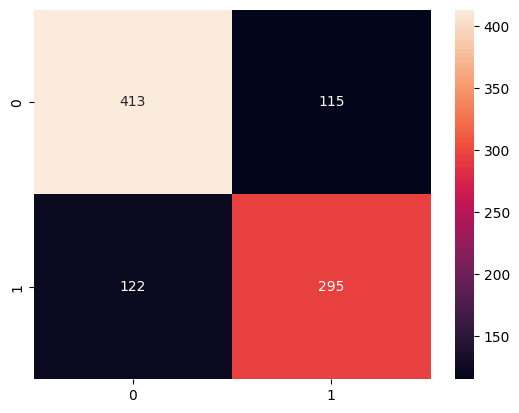

In [45]:
import seaborn as sns
cm = confusion_matrix(ytest, ypredict)
sns.heatmap(cm,annot=True,fmt=',')